In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# These 
L = 145.44
m = 8192

arr = np.fft.fftshift(np.fft.fftfreq(m, d=1.0 / (2.0 * L)))

diffracted100 = np.load('/data101/prunet/diffraction_n100_m8192_500.npy')
diffracted100 = diffracted100[:,m//2]

diffracted200 = np.load('/data101/prunet/diffraction_n200_m8192_500.npy')
diffracted200 = diffracted200[:,m//2]

diffracted400 = np.load('/data101/prunet/diffraction_n400_m8192_500.npy')
diffracted400 = diffracted400[:,m//2]

diffracted1000 = np.load('/data101/prunet/diffraction_n1000_m8192_500.npy')
diffracted1000 = diffracted1000[:,m//2]

diffracted2000 = np.load('/data101/prunet/diffraction_n2000_m8192_500.npy')
diffracted2000 = diffracted2000[:,m//2]

diffracted4000 = np.load('/data101/prunet/diffraction_n4000_m8192_500.npy')
diffracted4000 = diffracted4000[:,m//2]

diffracted8000 = np.load('/data101/prunet/diffraction_n4000_m8192_500.npy')
diffracted8000 = diffracted8000[:,m//2]


diffracted_claude = np.load('/data101/prunet/diffraction_claude_500.npy')
diffracted_claude = diffracted_claude[:,m//2]


In [ ]:
plt.clf()

ax=plt.gca()
ax.plot(arr, 2.*np.log10(np.abs(diffracted100)), label='100 points', color='black')
#plt.plot(arr, 2.*np.log10(np.abs(diffracted200)), label='200 points')
#plt.plot(arr, 2.*np.log10(np.abs(diffracted400)), label='400 points')
ax.plot(arr, 2.*np.log10(np.abs(diffracted1000)), label='1000 points', color='red')
ax.plot(arr, 2.*np.log10(np.abs(diffracted4000)), label='4000 points', color='green')
ax.plot(arr, 2.*np.log10(np.abs(diffracted8000)), label='8000 points', color='orange',linestyle='dotted')
##ax.plot(arr, 2.*np.log10(np.abs(diffracted_claude)), label='High res. 2D FFT')
plt.ylabel(r'log$_{10}$I')
plt.xlabel(r'$\rho$ (meters)')
plt.xlim(0,25)
plt.ylim(-13,-1)
#x1,x2,y1,y2 = 0,5,-13,-7
#axins = ax.inset_axes([0.5,0.05,0.45,0.5],xlim=(x1,x2),ylim=(y1,y2),xticklabels=[],yticklabels=[])
#axins.set_xticks([])
#axins.set_yticks([])
#axins.plot(arr, 2.*np.log10(np.abs(diffracted100)))
#axins.plot(arr, 2.*np.log10(np.abs(diffracted4000)))
#axins.plot(arr, 2.*np.log10(np.abs(diffracted8000)))
##axins.plot(arr, 2.*np.log10(np.abs(diffracted_claude)))

#ax.indicate_inset_zoom(axins,edgecolor='black')
ax.legend()
#plt.show()
plt.savefig('Diffraction-profile-number-of-points.pdf')
plt.close()

In [56]:
#fmask = np.load('/data101/prunet/fmask_n8000_m8192.npy')
fmask = np.load('Fourier_masks/fmask_n8000_m8192.npy')

fmask.shape

(8192, 8192)

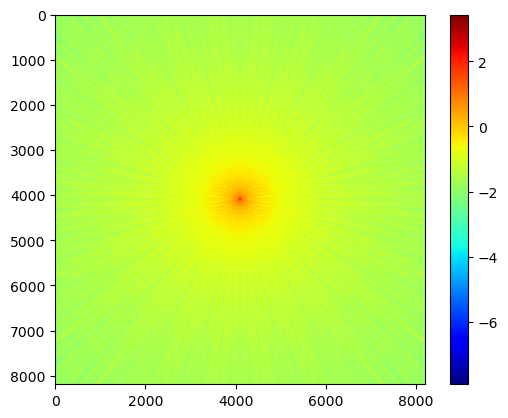

In [57]:
plt.imshow(np.log10(np.abs(fmask)))
plt.jet()
plt.colorbar()
plt.show()


In [58]:
import h5py
#f = h5py.File('/data101/prunet/Pour_Simon/NW2_FouOc_Petal_N23n21m13.mat')
f = h5py.File('Matlab_files/NW2_FouOc_Petal_N23n21m13.mat')

list(f.keys())
fmask_claude = np.asarray(f['FouOc'])
fmask_claude = fmask_claude['real']+1j*fmask_claude['imag']

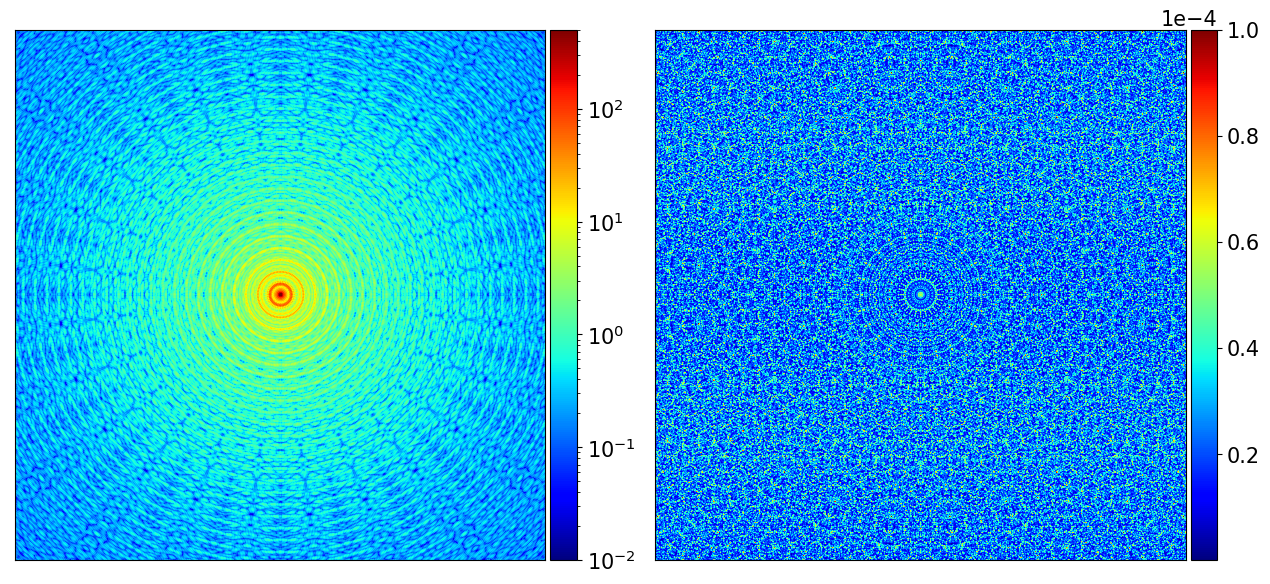

In [93]:
from matplotlib import colors
nzoom = 1000
fig,axs=plt.subplots(1,2,figsize=(6.4*2,4.8*1.4))
im0=axs[0].imshow(np.abs(fmask.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom]),norm=colors.LogNorm(vmax=500,vmin=1e-2))
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.setp(axs[0],xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

im1=axs[1].imshow(np.abs((fmask_claude.real-fmask.real)[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom]),vmax=1e-4)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.setp(axs[1],xticks=[],yticks=[])
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.offsetText.set(size=15)
cbar.update_ticks()


plt.tight_layout()

In [94]:
fig.savefig('TF_petal_and_diff.png')

In [ ]:
from astropy.io import fits
hdu = fits.PrimaryHDU(fmask.real)
hdu.writeto('fmask.real.fits')
hdu = fits.PrimaryHDU(fmask_claude.real)
hdu.writeto('fmask_claude.real.fits')